**K-Means**

In [59]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [60]:
# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data  # The feature data
y = iris.target  # The actual species labels (for reference, but not used in clustering)

In [61]:
# Step 3: Standardize the data (optional but useful)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# Step 4: Elbow method to find the optimal number of clusters
wcss = []
k_values = range(1, 11)  # Test for 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # WCSS is the inertia attribute of the fitted model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

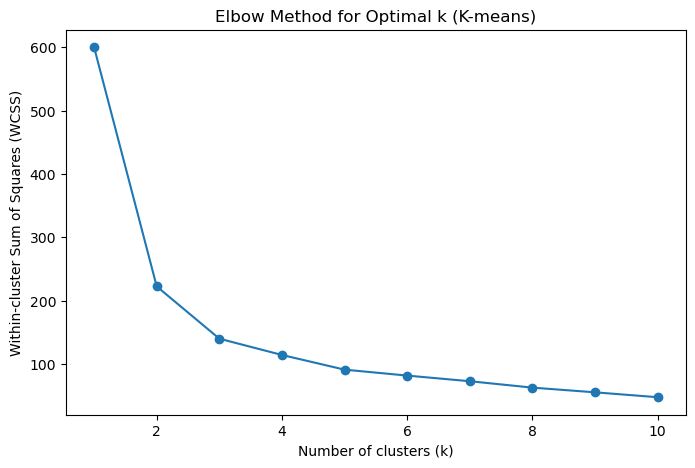

In [63]:
# Step 5: Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k (K-means)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()

In [64]:
# Step 6: Perform K-means clustering with K-means++ and standard K-means for comparison
# K-means with random initialization (standard)
kmeans_random = KMeans(n_clusters=3, random_state=42, init='random')
kmeans_random.fit(X_scaled)
clusters_random = kmeans_random.labels_

# K-means++ initialization
kmeans_pp = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans_pp.fit(X_scaled)
clusters_pp = kmeans_pp.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [65]:
# Step 7: Calculate the Silhouette Scores for both methods
silhouette_random = silhouette_score(X_scaled, clusters_random)
silhouette_pp = silhouette_score(X_scaled, clusters_pp)

print(f'Silhouette Score for K-means (random init): {silhouette_random:.2f}')
print(f'Silhouette Score for K-means++: {silhouette_pp:.2f}')

Silhouette Score for K-means (random init): 0.46
Silhouette Score for K-means++: 0.46


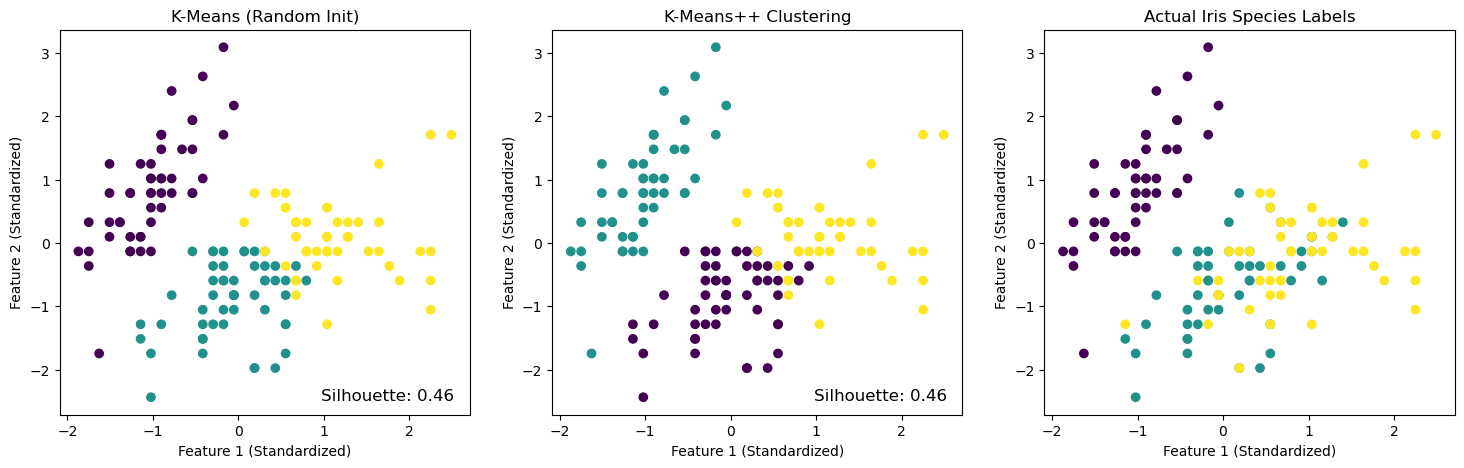

In [66]:
# Step 8: Visualize the clusters vs actual labels (using only two dimensions for simplicity)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot of K-means (random init) clusters
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_random, cmap='viridis', marker='o')
ax1.set_title('K-Means (Random Init)')
ax1.set_xlabel('Feature 1 (Standardized)')
ax1.set_ylabel('Feature 2 (Standardized)')
ax1.text(0.80, 0.05, f'Silhouette: {silhouette_random:.2f}', ha='center', va='center', transform=ax1.transAxes, fontsize=12, color='black')

# Plot of K-means++ clusters
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_pp, cmap='viridis', marker='o')
ax2.set_title('K-Means++ Clustering')
ax2.set_xlabel('Feature 1 (Standardized)')
ax2.set_ylabel('Feature 2 (Standardized)')
ax2.text(0.80, 0.05, f'Silhouette: {silhouette_pp:.2f}', ha='center', va='center', transform=ax2.transAxes, fontsize=12, color='black')

# Plot of actual labels
ax3.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', marker='o')
ax3.set_title('Actual Iris Species Labels')
ax3.set_xlabel('Feature 1 (Standardized)')
ax3.set_ylabel('Feature 2 (Standardized)')

plt.show()


**DBSCAN**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [10]:
# Step 1: Load and scale the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Actual labels
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Step 2: Calculate the KNN distances with min_samples=5
k = 5  # Choose the number of neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort distances to plot the KNN distances
distances = np.sort(distances[:, k-1], axis=0)

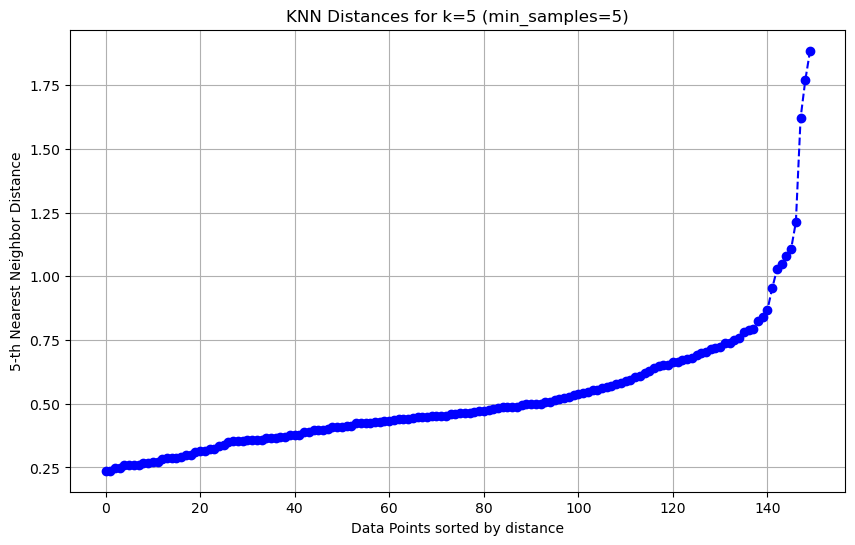

In [14]:
# Step 3: Plot the KNN distances to identify the best epsilon
plt.figure(figsize=(10, 6))
plt.plot(distances, marker='o', linestyle='--', color='b')
plt.title(f'KNN Distances for k={k} (min_samples=5)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.grid()
plt.show()

In [16]:
# Step 4: Define the best epsilon based on observations
best_eps = 1.1

In [18]:
# Step 5: Run DBSCAN with selected parameters
dbscan = DBSCAN(eps=best_eps, min_samples=5)
clusters_final = dbscan.fit_predict(X_scaled)

In [20]:
if len(set(clusters_final)) > 1:  # Ensure there's more than 1 cluster to compute score
    silhouette_avg = silhouette_score(X_scaled, clusters_final)
else:
    silhouette_avg = -1  # Handle case where there's only one cluster (or all noise)

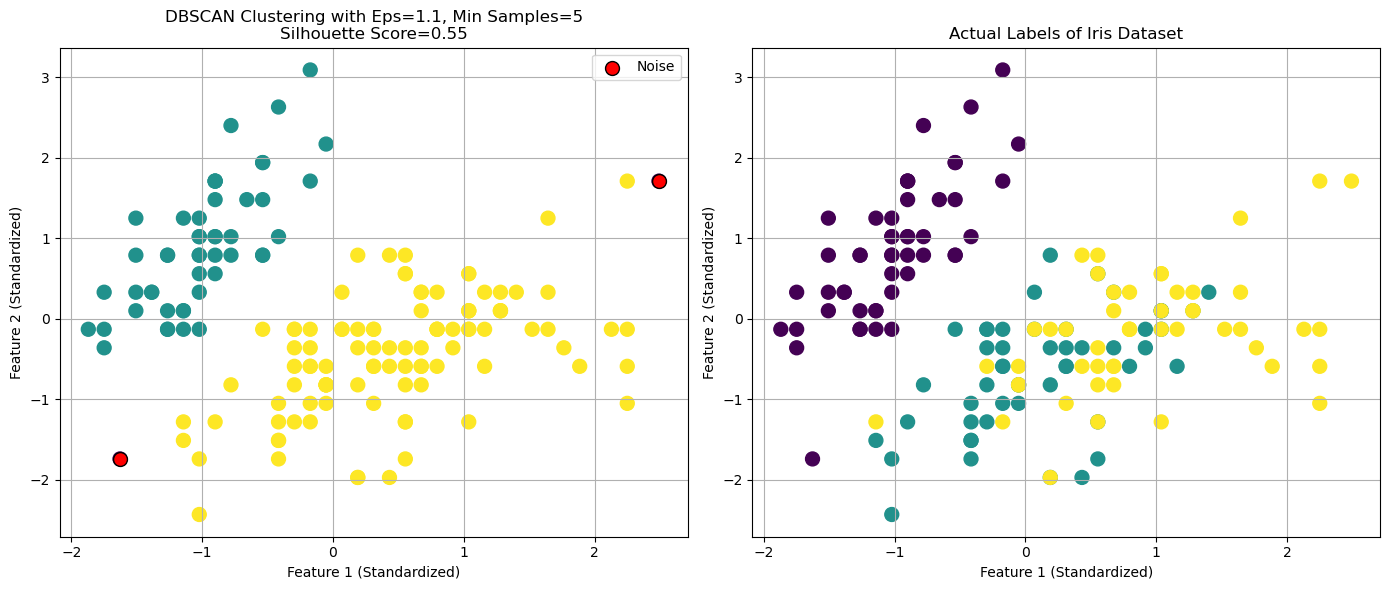

In [22]:
# Step 7: Create subplots for DBSCAN results and actual labels
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# DBSCAN Clustering Plot
# Create a scatter plot for clusters
scatter = ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_final, cmap='viridis', marker='o', s=100)

# Highlighting noise points (those labeled as -1)
noise_points = X_scaled[clusters_final == -1]
ax[0].scatter(noise_points[:, 0], noise_points[:, 1], color='red', label='Noise', s=100, edgecolor='k')

# Adding titles and labels
ax[0].set_title(f'DBSCAN Clustering with Eps={best_eps}, Min Samples=5\nSilhouette Score={silhouette_avg:.2f}')
ax[0].set_xlabel('Feature 1 (Standardized)')
ax[0].set_ylabel('Feature 2 (Standardized)')
ax[0].legend()
ax[0].grid(True)

# Actual Labels Plot
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', marker='o', s=100)
ax[1].set_title('Actual Labels of Iris Dataset')
ax[1].set_xlabel('Feature 1 (Standardized)')
ax[1].set_ylabel('Feature 2 (Standardized)')
ax[1].grid(True)

# Show the plots side by side
plt.tight_layout()
plt.show()